In [70]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
dfs = []

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        dfs.append(pd.read_csv(os.path.join(dirname, filename)))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [71]:
import keras
import matplotlib.pyplot as plt 


In [72]:
train_df = dfs[1]

In [73]:
test_df = dfs[2]

In [74]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
train_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [76]:
pixel_num = train_df.shape[1] - 1
pixel_row_num = int((pixel_num) ** 0.5)
pixel_num, pixel_num // 2, pixel_row_num

(784, 392, 28)

In [77]:
model = keras.Sequential([
    keras.layers.Dense(784, activation="relu", name="layer1"),
    keras.layers.Dense(392, activation="relu", name="layer2"),
    keras.layers.Dense(10, activation="softmax", name="layer3")
])

In [78]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [79]:
import tensorflow as tf

train = tf.convert_to_tensor(train_df)
test = tf.convert_to_tensor(test_df)

In [86]:
X = train[:, 1:] / 255
y = train[:, 0]

num_samples = X.shape[0]
split = int(num_samples * 3/4)

X_train = X[:split, :]
y_train = y[:split]

X_test = X[split:, :]
y_test = y[split:]

In [87]:
X_train.shape, y_test.shape

(TensorShape([31500, 784]), TensorShape([10500]))

In [90]:
print("Fit model on training data")
history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=10,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_test, y_test),
)

Fit model on training data
Epoch 1/10
493/493 [==============================] - 4s 9ms/step - loss: 0.0651 - sparse_categorical_accuracy: 0.9806 - val_loss: 0.1177 - val_sparse_categorical_accuracy: 0.9707
Epoch 2/10
493/493 [==============================] - 4s 7ms/step - loss: 0.0479 - sparse_categorical_accuracy: 0.9850 - val_loss: 0.1211 - val_sparse_categorical_accuracy: 0.9745
Epoch 3/10
493/493 [==============================] - 4s 7ms/step - loss: 0.0359 - sparse_categorical_accuracy: 0.9896 - val_loss: 0.1317 - val_sparse_categorical_accuracy: 0.9723
Epoch 4/10
493/493 [==============================] - 4s 7ms/step - loss: 0.0297 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.1387 - val_sparse_categorical_accuracy: 0.9764
Epoch 5/10
493/493 [==============================] - 4s 7ms/step - loss: 0.0252 - sparse_categorical_accuracy: 0.9932 - val_loss: 0.1356 - val_sparse_categorical_accuracy: 0.9756
Epoch 6/10
493/493 [==============================] - 4s 8ms/step - loss:

In [247]:

def test_model(index):
    prediction = model.predict(X_test[index:index+1])[0].argmax()
    target = y_test[index]

    print(f"Real: {target}, Prediction: {prediction}")
    g = plt.imshow(X_test[index].numpy().reshape(pixel_row_num, pixel_row_num))

    if target != prediction:
        print("ERROR, MISMATCH")
        return -1
    
    

In [248]:
def find_next_mismatch(start_index):
    i = start_index
    result = 0
    while result != -1:
        result = test_model(i)
        i += 1
    return i

In [249]:
i = 1

In [250]:
i -= 2

1/1 [==============================] - 0s 17ms/step
Real: 8, Prediction: 8
1/1 [==============================] - 0s 17ms/step
Real: 9, Prediction: 9
1/1 [==============================] - 0s 18ms/step
Real: 8, Prediction: 8
1/1 [==============================] - 0s 16ms/step
Real: 7, Prediction: 7
1/1 [==============================] - 0s 18ms/step
Real: 9, Prediction: 9
1/1 [==============================] - 0s 19ms/step
Real: 6, Prediction: 6
1/1 [==============================] - 0s 16ms/step
Real: 8, Prediction: 8
1/1 [==============================] - 0s 17ms/step
Real: 3, Prediction: 3
1/1 [==============================] - 0s 17ms/step
Real: 4, Prediction: 4
1/1 [==============================] - 0s 16ms/step
Real: 2, Prediction: 2
1/1 [==============================] - 0s 17ms/step
Real: 7, Prediction: 7
1/1 [==============================] - 0s 16ms/step
Real: 3, Prediction: 3
1/1 [==============================] - 0s 16ms/step
Real: 5, Prediction: 5
1/1 [====================

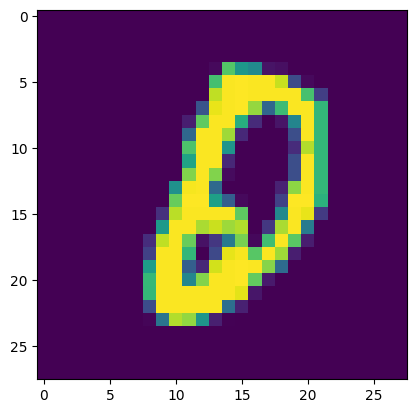

In [268]:
index = find_next_mismatch(index)